In [63]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import lime
from lime import lime_tabular
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
dataset=pd.read_csv('merge.csv')
dataset.head()

timestamp        date (UTC)  NO2 (ppb)  VOC (ppb)  pm 10 (ug/m3)  \
0  1680841264  07-04-2023 04:21         58        161      42.242280   
1  1680841324  07-04-2023 04:22         58        163      44.033030   
2  1680841384  07-04-2023 04:23         60        162      40.469963   
3  1680841444  07-04-2023 04:24         58        163      34.787033   
4  1680841504  07-04-2023 04:25         60        163      45.632010   

   pm 2.5 (ug/m3)  pm 1 (ug/m3)  class  
0       36.364796          23.0      1  
1       43.033030          28.0      1  
2       39.469963          28.0      1  
3       33.787033          22.0      1  
4       44.632010          29.0      1

In [65]:
dataset = dataset.drop(dataset.columns[[0, 1]], axis=1)

In [66]:
dataset.head()

NO2 (ppb)  VOC (ppb)  pm 10 (ug/m3)  pm 2.5 (ug/m3)  pm 1 (ug/m3)  class
0         58        161      42.242280       36.364796          23.0      1
1         58        163      44.033030       43.033030          28.0      1
2         60        162      40.469963       39.469963          28.0      1
3         58        163      34.787033       33.787033          22.0      1
4         60        163      45.632010       44.632010          29.0      1

In [40]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')

imputer.fit(dataset)
dataset=imputer.transform(dataset)

In [41]:
X =dataset[:, :5]
y = dataset[:, -1]

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)
print(reduced_data)

[[ 33.89111458   5.21030706]
 [ 33.80704378   8.09065854]
 [ 35.73645512   5.8066445 ]
 ...
 [-24.27718737   3.43644895]
 [-26.08734581   4.81017094]
 [-24.00441532   1.98845912]]


In [43]:
X=reduced_data

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reduced_data= scaler.fit_transform(reduced_data)



In [45]:
X=reduced_data

In [46]:
from sklearn.cluster import KMeans

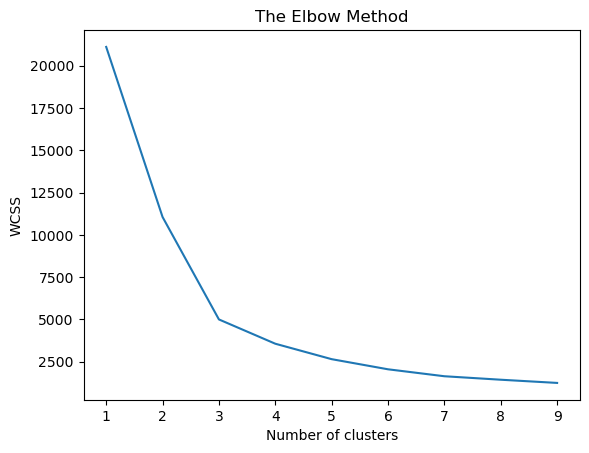

In [47]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [49]:
labels = kmeans.labels_

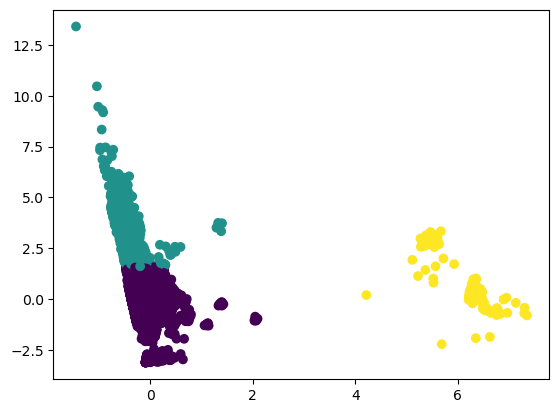

In [50]:
plt.scatter(X[:, 0], X[:, 1], c=labels)

In [51]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_kmeans, test_size = 0.3, random_state = 100)

In [53]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [54]:
y_pred = classifier.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2938    0    0]
 [   0   84    0]
 [   1    0  145]]


0.9996843434343434

In [56]:
replacements={0:0,1:1,2:1}
y0_kmeans = np.array([replacements.get(val, val) for val in y_kmeans])

In [57]:
from sklearn.model_selection import train_test_split
X0_train, X0_test, y0_train, y0_test = train_test_split(X, y0_kmeans, test_size = 0.3, random_state = 100)

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X0_train, y0_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [59]:
y0_pred = classifier.predict(X0_test)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y0_test, y0_pred)
print(cm)
accuracy_score(y0_test, y0_pred)

[[2938    0]
 [   1  229]]


0.9996843434343434

In [61]:
explainer = lime.lime_tabular.LimeTabularExplainer(X, feature_names=[f"Feature {i}" for i in range(X.shape[1])], class_names=[  ' class 0', ' not class 0'])

In [62]:
instance_idx = 700
explanation = explainer.explain_instance(X[instance_idx], classifier.predict_proba)
explanation.show_in_notebook()

In [26]:
replacements={0:0,1:1,2:0}
y1_kmeans = np.array([replacements.get(val, val) for val in y_kmeans])

In [27]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1_kmeans, test_size = 0.3, random_state = 100)

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier1.fit(X1_train, y1_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [29]:
explainer = lime.lime_tabular.LimeTabularExplainer(X1_train, feature_names=[f"Feature {i}" for i in range(X.shape[1])], class_names=[  '  not class 1', ' class 1'])

In [30]:
instance_idx = 6760
explanation = explainer.explain_instance(X[instance_idx], classifier1.predict_proba)
explanation.show_in_notebook()

In [31]:
replacements={0:0,1:0,2:2}
y2_kmeans = np.array([replacements.get(val, val) for val in y_kmeans])

In [32]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2_kmeans, test_size = 0.3, random_state = 100)

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier2.fit(X2_train, y2_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [34]:
explainer = lime.lime_tabular.LimeTabularExplainer(X2_train, feature_names=[f"Feature {i}" for i in range(X.shape[1])], class_names=[  ' not class 2', '   class 2'])

In [35]:
instance_idx = 7799
explanation = explainer.explain_instance(X[instance_idx], classifier2.predict_proba)
explanation.show_in_notebook()

In [70]:
for index, value in enumerate(y_kmeans):
    print(f"Index: {index}, Value: {value}")

Index: 0, Value: 0
Index: 1, Value: 0
Index: 2, Value: 0
Index: 3, Value: 0
Index: 4, Value: 0
Index: 5, Value: 0
Index: 6, Value: 0
Index: 7, Value: 0
Index: 8, Value: 0
Index: 9, Value: 0
Index: 10, Value: 0
Index: 11, Value: 0
Index: 12, Value: 0
Index: 13, Value: 0
Index: 14, Value: 0
Index: 15, Value: 0
Index: 16, Value: 0
Index: 17, Value: 0
Index: 18, Value: 0
Index: 19, Value: 0
Index: 20, Value: 0
Index: 21, Value: 0
Index: 22, Value: 0
Index: 23, Value: 0
Index: 24, Value: 0
Index: 25, Value: 0
Index: 26, Value: 0
Index: 27, Value: 0
Index: 28, Value: 0
Index: 29, Value: 0
Index: 30, Value: 0
Index: 31, Value: 0
Index: 32, Value: 0
Index: 33, Value: 0
Index: 34, Value: 0
Index: 35, Value: 0
Index: 36, Value: 0
Index: 37, Value: 0
Index: 38, Value: 0
Index: 39, Value: 0
Index: 40, Value: 0
Index: 41, Value: 0
Index: 42, Value: 0
Index: 43, Value: 0
Index: 44, Value: 0
Index: 45, Value: 0
Index: 46, Value: 0
Index: 47, Value: 0
Index: 48, Value: 0
Index: 49, Value: 0
Index: 50,

In [151]:
import shap

In [152]:
explainer = shap.TreeExplainer(classifier,X_train)

In [153]:
column_names=['feature1','feature2']
X_train=pd.DataFrame(X_train, columns=column_names)

In [154]:
column_names=['feature1','feature2']
X_test=pd.DataFrame(X_test, columns=column_names)

In [155]:
instance_idx = 1 
instance = X_test.iloc[instance_idx]

In [156]:
shap_values = explainer.shap_values(instance)
shap_values_np = np.array(shap_values)


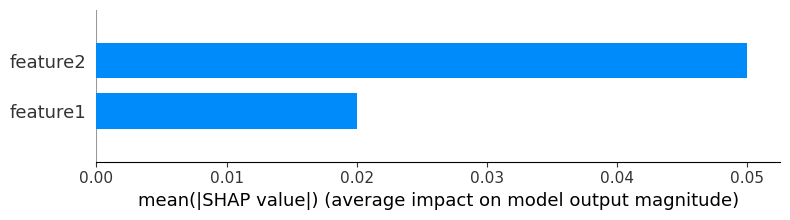

In [157]:
shap.summary_plot(shap_values_np, X_test, class_names=classifier.classes_, feature_names=X_train.columns, plot_type='bar')

In [159]:
column_names=['class']
y_kmeans=pd.DataFrame(y_kmeans, columns=column_names)

In [160]:
combined_df = pd.concat([y_kmeans,y ], axis=1)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [163]:
for i in range(len(X)):
    instance = X[i]
    target = y[i]

    # Make a prediction for the instance
    predicted = classifier.predict([instance])[0]
    print(f"True Label: {target}, Predicted Label: {predicted}")

True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted L

True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted L

True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted L

True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 1.0, Predicted L

True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted L

True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted L

True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted L

True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted L

True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted L

True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted L

True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted L

True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted L

True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted L

True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted L

True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted L

True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted Label: 1
True Label: 3.0, Predicted L

True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted L

True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted L

True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted L

True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted Label: 0
True Label: 3.0, Predicted L

True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted Label: 0
True Label: 4.0, Predicted L

True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted L

True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 2
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted L

True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted Label: 0
True Label: 5.0, Predicted L

In [99]:
#instance_to_explain = X_train[]
#shap_values = explainer.shap_values(instance_to_explain)
#feature_names=["feature 1","feature 2"]
#explanation = shap.Explanation(values=shap_values[1], base_values=explainer.expected_value[1], data=X_train[0], feature_names=feature_names) 
#explanation = shap.Explanation(values=shap_values[1][0], data=instance_to_explain, feature_names=feature_names)


In [101]:
#shap.waterfall_plot(shap.Explanation(values=shap_values[1][0], data=instance_to_explain, feature_names=feature_names))
#shap.force_plot(explainer.expected_value[1], shap_values[1][0], instance_to_explain, feature_names=feature_names)

AssertionError: visualize() can only display Explanation objects (or arrays of them)!

In [23]:
#explainer = lime.lime_tabular.LimeTabularExplainer(X, feature_names=[f"Feature {i}" for i in range(X.shape[1])], class_names=[  ' class 0', ' not class 0'])

In [24]:
#instance_idx = 500
#explanation = explainer.explain_instance(X[instance_idx], classifier.predict_proba)
#explanation.show_in_notebook()

In [27]:
#class_names=['class 0','class 1','class 2']

In [28]:
#def predict_proba(X):
 #   return classifier.predict_proba(X)

In [29]:
#instance_idx = np.random.randint(0, len(X_test))
#instance = X_test[instance_idx]
#true_class = y_test[instance_idx]

In [30]:
#explanation = explainer.explain_instance(instance, predict_proba, num_features=2, top_labels=3)

In [1]:
#shap model previous one 
#instance_idx = 1
#instance = X_train.iloc[instance_idx]

NameError: name 'X_train' is not defined

In [ ]:
#import shap
#explainer = shap.TreeExplainer(classifier)
#shap_values = explainer.shap_values(X_test)
#shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
#shap.initjs()
#shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0, :])